# Starcraft Player Rank Prediction

Using a dataset of Starcraft player performance data in ranked games. Develop a model to predict a player’s rank

In [25]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("starcraft_player_data.csv")

# Data Structure

In [27]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

The dataset counts with 20 different variables. We have a total of 3395 observations. There are no missing values. Most of the variables are either int or float, however, Age, HoursPerWeek and TotalHours are of type object. Object types could suggest a categorical attributes, but we will check that. Also, the LeagueIndex is the ranking of the players.

In [29]:
df['Age'].value_counts()

20    357
21    344
18    325
22    314
19    313
23    259
16    256
17    248
24    225
25    168
26    136
27    111
28     73
?      55
29     52
30     32
31     29
32     21
35     17
33     15
34     15
36      8
37      5
38      5
40      4
39      3
41      3
43      1
44      1
Name: Age, dtype: int64

In [30]:
df['HoursPerWeek'].value_counts()

10     411
8      390
20     335
12     331
6      323
28     280
24     233
16     223
4      219
14     181
2      108
42      92
?       56
30      54
36      50
56      33
18      24
40      12
70       9
48       7
32       5
50       5
84       2
96       2
60       2
168      1
0        1
112      1
98       1
90       1
140      1
72       1
80       1
Name: HoursPerWeek, dtype: int64

In [31]:
df['TotalHours'].value_counts()[:20]

500     328
400     213
1000    210
300     202
600     187
800     186
700     170
200     168
730     123
100     116
450      97
250      85
150      73
900      71
750      70
350      66
1500     58
?        57
2000     55
650      47
Name: TotalHours, dtype: int64

All the object type features have a `?` as a value with around 50 observations. 50 represent around 1% of the total number of observations. We have to decide what to with the `?` so that we could transform these variables into a numerical type.

In [32]:
df['LeagueIndex'].value_counts()

4    811
5    806
6    621
3    553
2    347
1    167
8     55
7     35
Name: LeagueIndex, dtype: int64

There are 8 different ranks for the players. The ranks do not have the same number of observations. We have few observations of the top ranks 7 and 8.

In [33]:
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


The dataset contains variables from different scales. Many variables such as `SelectByHotkeys`, `MinimapAttacks`, `MinimapRightClicks`, `ComplexUnitsMade` have very samall values. The values for GameID are between 52 to 10095, it is an identifier but does not include every number in that interval.

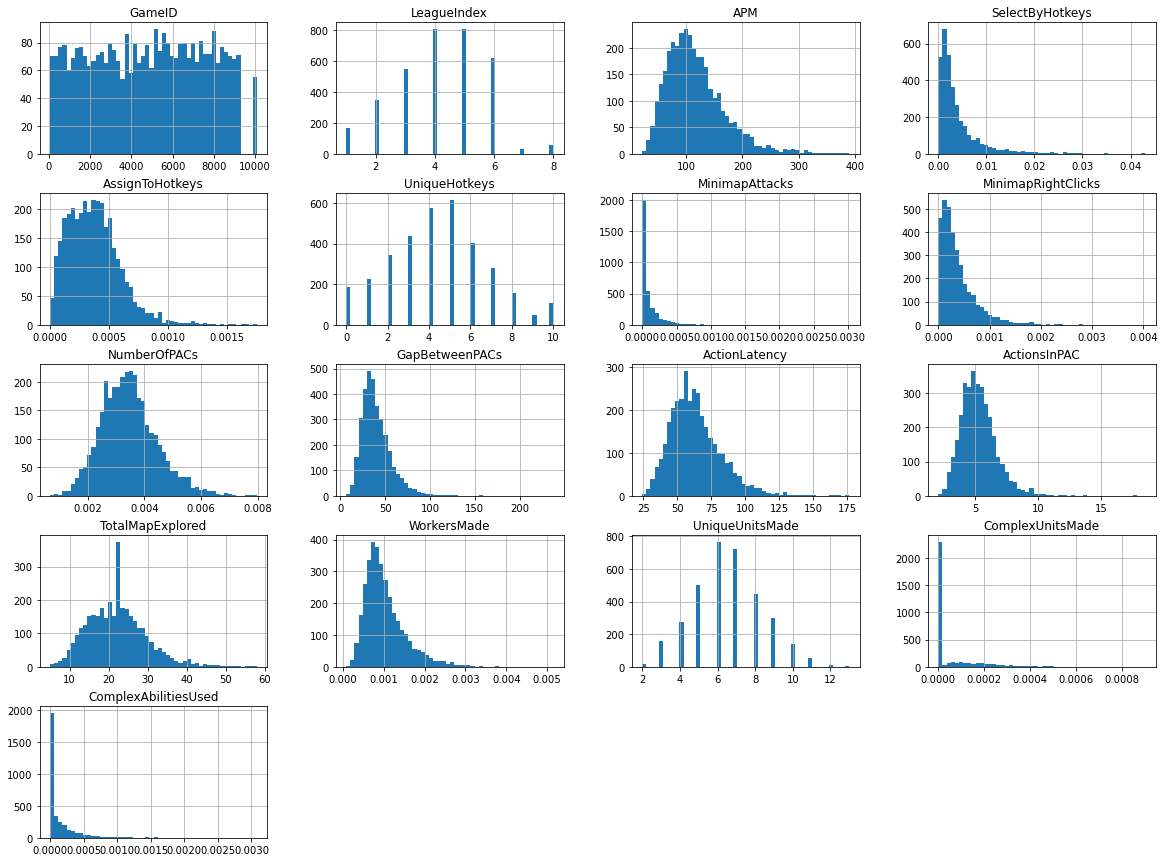

In [34]:
df.hist(bins=50, figsize=(20,15))
plt.show()

From these histograms we can see the different scales of the attributes. Some of them are tail-heavy, extending more to the right of median. We can also see that variables such as `UniqueUnitsMade` and `UniqueHotKeys` have a small and unique range of values. Most of the observations for `MinimapAttacks`, `ComplexUnitsMade` and `ComplexAbilitiesUsed` have a certain value that counts for around 2000 observations.

## Test Set

To guarantee that the test set is representative of the population, we will do stratified sampling. We want that the correct number of observations are taken from each of the League Ranking (1-8)

In [35]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df, df['LeagueIndex']):
    strat_train_set = df.loc[train_idx]
    strat_test_set = df.loc[test_idx]

In [36]:
strat_test_set['LeagueIndex'].value_counts()/len(strat_test_set)

4    0.238586
5    0.237113
6    0.182622
3    0.163476
2    0.101620
1    0.050074
8    0.016200
7    0.010309
Name: LeagueIndex, dtype: float64

In [37]:
df['LeagueIndex'].value_counts()/len(df)

4    0.238881
5    0.237408
6    0.182916
3    0.162887
2    0.102209
1    0.049190
8    0.016200
7    0.010309
Name: LeagueIndex, dtype: float64

The category proportions in the test set and the full dataset are very similar after the strat sampling.

# Discover and Visualize Data for Insights

We will try to get more insights of the data we are working on.

In [38]:
# Create copy of data so that we do not harm the train set
player = strat_train_set.copy()

## Correlations

Calculate the standard correlation coefficient between every pair of attributes

In [39]:
corr_matrix = player.corr()

Now, we are looking at how each feature correlates with the `LeagueIndex`

In [41]:
corr_matrix['LeagueIndex'].sort_values(ascending=False)

LeagueIndex             1.000000
APM                     0.662981
NumberOfPACs            0.610729
AssignToHotkeys         0.536123
SelectByHotkeys         0.489363
UniqueHotkeys           0.355748
MinimapAttacks          0.308032
WorkersMade             0.298416
MinimapRightClicks      0.231616
TotalMapExplored        0.228932
ComplexUnitsMade        0.155009
ActionsInPAC            0.142950
ComplexAbilitiesUsed    0.141644
UniqueUnitsMade         0.138639
GameID                  0.114704
GapBetweenPACs         -0.548091
ActionLatency          -0.668314
Name: LeagueIndex, dtype: float64

From the results, it is noticeable that there exist correlation between the attributes and LeagueIndex. For example, there is a positive correlation between APM and the LeagueIndex. When the APM increases, the LeagueIndex increases. There is a negative correlation between ActionLatency and LeagueIndex. When the ActionLatency increases, the LeagueIndex goes down. The lowest correlation is the GameID, it makes sense because is just the identifier of the Games.

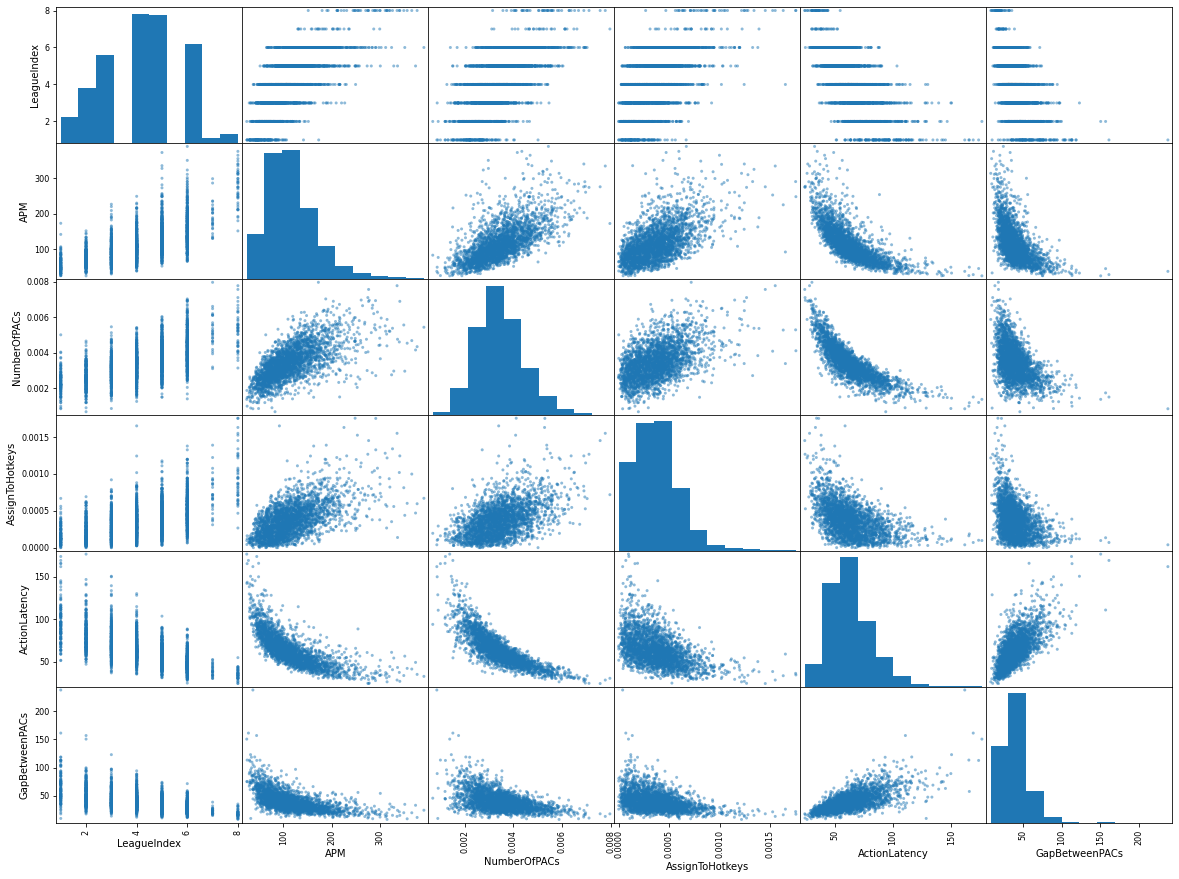

In [45]:
from pandas.plotting import scatter_matrix

attributes = ['LeagueIndex', 'APM', 'NumberOfPACs', 'AssignToHotkeys', 'ActionLatency', 'GapBetweenPACs']
scatter_matrix(player[attributes], figsize=(20, 15))
plt.show()

# Prepare the Data

In [46]:
# Revert train set
player = strat_train_set.drop('LeagueIndex', axis=1)
player_labels = strat_train_set['LeagueIndex'].copy()

## Data Cleaning

Earlier we learned that we had missing values represented as `?` for three attributes: Age, HoursPerWeek and TotalHours, so we will deal with them now:

In [64]:
player['Age'] = player['Age'].replace('?', np.nan).astype(float)
player['HoursPerWeek'] = player['HoursPerWeek'].replace('?', np.nan).astype(float)
player['TotalHours'] = player['TotalHours'].replace('?', np.nan).astype(float)

In [74]:
player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 239 to 3189
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                2716 non-null   int64  
 1   Age                   2672 non-null   float64
 2   HoursPerWeek          2671 non-null   float64
 3   TotalHours            2670 non-null   float64
 4   APM                   2716 non-null   float64
 5   SelectByHotkeys       2716 non-null   float64
 6   AssignToHotkeys       2716 non-null   float64
 7   UniqueHotkeys         2716 non-null   int64  
 8   MinimapAttacks        2716 non-null   float64
 9   MinimapRightClicks    2716 non-null   float64
 10  NumberOfPACs          2716 non-null   float64
 11  GapBetweenPACs        2716 non-null   float64
 12  ActionLatency         2716 non-null   float64
 13  ActionsInPAC          2716 non-null   float64
 14  TotalMapExplored      2716 non-null   int64  
 15  WorkersMade        

We can see the missing values

First, we replaced the `?` with np.nan and change the type from object to numeric. Then, using the SimpleImputer, we replace all the missing values with the median for that attribute.

In [67]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [68]:
imputer.fit(player)

SimpleImputer(strategy='median')

The imputer calculates the median for all the attributes, we make sure they are the same from the train data

In [70]:
imputer.statistics_

array([4.91550000e+03, 2.10000000e+01, 1.20000000e+01, 5.00000000e+02,
       1.08249900e+02, 2.49663500e-03, 3.55286000e-04, 4.00000000e+00,
       3.96951436e-05, 2.83946850e-04, 3.39419005e-03, 3.66285000e+01,
       6.09238500e+01, 5.11915000e+00, 2.20000000e+01, 9.08010000e-04,
       6.00000000e+00, 0.00000000e+00, 2.02890000e-05])

In [71]:
player.median().values

array([4.91550000e+03, 2.10000000e+01, 1.20000000e+01, 5.00000000e+02,
       1.08249900e+02, 2.49663500e-03, 3.55286000e-04, 4.00000000e+00,
       3.96951436e-05, 2.83946850e-04, 3.39419005e-03, 3.66285000e+01,
       6.09238500e+01, 5.11915000e+00, 2.20000000e+01, 9.08010000e-04,
       6.00000000e+00, 0.00000000e+00, 2.02890000e-05])

The imputer help us transform the train set by filling missing values with the medians that it learned

In [72]:
X = imputer.transform(player)
player_tr = pd.DataFrame(X, columns=player.columns, index=player.index)
player_tr.head()

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
239,713.0,20.0,20.0,500.0,133.8408,0.004806,0.000397,1.0,0.000031,0.000334,0.004232,33.6436,47.2494,5.0049,31.0,0.000972,7.0,0.000303,0.000031
2875,7990.0,22.0,12.0,500.0,124.0110,0.004002,0.000440,4.0,0.000023,0.000197,0.003875,23.4251,56.7522,5.3463,28.0,0.001053,10.0,0.000104,0.000671
2358,6608.0,22.0,6.0,500.0,126.3222,0.001503,0.000501,3.0,0.000200,0.000326,0.003482,30.2319,62.6187,6.2950,17.0,0.000777,5.0,0.000000,0.000000
2185,6138.0,16.0,14.0,600.0,139.8240,0.007269,0.000373,5.0,0.000050,0.000921,0.003610,43.8611,61.9862,5.1241,9.0,0.000797,4.0,0.000000,0.000000
884,2564.0,18.0,56.0,1650.0,184.2078,0.009488,0.000387,3.0,0.000029,0.001333,0.003612,20.8924,54.3175,7.4087,24.0,0.001405,6.0,0.000344,0.001247


## Custom Transformer

We use the custom transformer to automate data preparation steps. We will automate the data cleanup operation where we replaced the `?` with `np.nan` and we will drop the GameID column because is the identifier of the game and does not provide us with more information.

In [134]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "GameID","Age", "HoursPerWeek", "TotalHours"
gameID_ix, age_ix, hours_week_idx, total_hours_idx = [
    player.columns.get_loc(c) for c in col_names]

class PreprocessOperations(BaseEstimator, TransformerMixin):
    def __init__(self, missing_values=np.nan):
        self.missing_values = missing_values
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X.drop(X.columns[gameID_ix], axis=1)
        X.iloc[:, age_ix] = X.iloc[:, age_ix].replace(self.missing_values, np.nan).astype(float)
        X.iloc[:, hours_week_idx] = X.iloc[:, hours_week_idx].replace(self.missing_values, np.nan).astype(float)
        X.iloc[:, total_hours_idx] = X.iloc[:, total_hours_idx].replace(self.missing_values, np.nan).astype(float)
        return X

## Feature Scaling

We apply Standarization using the StandardScaler

## Transformation Pipeline

In [135]:
# Reset dataset
player = strat_train_set.drop('LeagueIndex', axis=1)

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('preprocess', PreprocessOperations(missing_values='?')),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
    ])

In [137]:
player_tr = pipeline.fit_transform(player)

# Select and Train a Model

We will select and train a model

## Training and Evaluating on the Training Set

In this step, we train and evaluate different ML models so that we shortlist 1-2 models to continue with fine-tuning. The evaluation metrics used are accuracy, confusion matrix, precision, recall.

### Log Reg

In [152]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(player_tr, player_labels)

LogisticRegression(solver='liblinear')

In [160]:
from sklearn.metrics import accuracy_score

accuracy_score(player_labels, log_reg.predict(player_tr))

0.41973490427098675

In [180]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())

In [182]:
log_reg_scores = cross_val_score(log_reg, player_tr, player_labels, cv=10, scoring="accuracy")
display_scores(log_reg_scores)

Scores: [0.33455882 0.40808824 0.40073529 0.40808824 0.39338235 0.35294118
 0.36531365 0.44280443 0.36531365 0.38745387]
Mean: 0.38586797265031475
Std: 0.030118135951347214


In [206]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

log_reg_pred = cross_val_predict(log_reg, player_tr, player_labels, cv=10)
print(confusion_matrix(player_labels, log_reg_pred))
print("\n")
print(classification_report(player_labels, log_reg_pred))

[[ 25  37  37  31   3   0   0   0]
 [ 21  51  68 120  13   5   0   0]
 [ 13  39  77 247  50  16   0   0]
 [  0  25  63 329 190  42   0   0]
 [  0   1  15 194 280 152   1   2]
 [  0   0   0  62 183 251   0   1]
 [  0   0   0   0   1  26   0   1]
 [  0   0   0   0   0   9   0  35]]


              precision    recall  f1-score   support

           1       0.42      0.19      0.26       133
           2       0.33      0.18      0.24       278
           3       0.30      0.17      0.22       442
           4       0.33      0.51      0.40       649
           5       0.39      0.43      0.41       645
           6       0.50      0.51      0.50       497
           7       0.00      0.00      0.00        28
           8       0.90      0.80      0.84        44

    accuracy                           0.39      2716
   macro avg       0.40      0.35      0.36      2716
weighted avg       0.38      0.39      0.37      2716



Logistic Regression model has an accuracy of around 39%

### Decision Tree Classifier

In [174]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(player_tr, player_labels)

DecisionTreeClassifier()

In [175]:
accuracy_score(player_labels, dt_clf.predict(player_tr))

1.0

In [183]:
dt_clf_scores = cross_val_score(dt_clf, player_tr, player_labels, cv=10, scoring="accuracy")
display_scores(dt_clf_scores)

Scores: [0.3125     0.33455882 0.32720588 0.29779412 0.32720588 0.3125
 0.31734317 0.32841328 0.29889299 0.34317343]
Mean: 0.31995875841111354
Std: 0.014077460558950755


In [207]:
dt_clf_pred = cross_val_predict(dt_clf, player_tr, player_labels, cv=10)
print(confusion_matrix(player_labels, dt_clf_pred))
print("\n")
print(classification_report(player_labels, dt_clf_pred))

[[ 38  30  31  26   8   0   0   0]
 [ 40  76  68  61  25   8   0   0]
 [ 29  75  96 149  71  22   0   0]
 [ 30  59 137 187 156  79   1   0]
 [  1  32  69 161 206 173   3   0]
 [  0   4  26  79 158 211  19   0]
 [  0   0   0   0   6  19   3   0]
 [  0   0   0   0   0   0   0  44]]


              precision    recall  f1-score   support

           1       0.28      0.29      0.28       133
           2       0.28      0.27      0.27       278
           3       0.22      0.22      0.22       442
           4       0.28      0.29      0.29       649
           5       0.33      0.32      0.32       645
           6       0.41      0.42      0.42       497
           7       0.12      0.11      0.11        28
           8       1.00      1.00      1.00        44

    accuracy                           0.32      2716
   macro avg       0.36      0.36      0.36      2716
weighted avg       0.32      0.32      0.32      2716



Decision Trees model has an accuracy of around 32%

### Random Forest Classifier

In [162]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(player_tr, player_labels)

RandomForestClassifier()

In [163]:
accuracy_score(player_labels, rf.predict(player_tr))

1.0

In [184]:
rf_scores = cross_val_score(rf, player_tr, player_labels, cv=10, scoring="accuracy")
display_scores(rf_scores)

Scores: [0.41544118 0.44485294 0.41544118 0.39338235 0.38235294 0.38235294
 0.40590406 0.4501845  0.34686347 0.40221402]
Mean: 0.4038989581072281
Std: 0.028956852507742596


In [212]:
rf_pred = cross_val_predict(rf, player_tr, player_labels, cv=10)
print(confusion_matrix(player_labels, rf_pred))
print("\n")
print(classification_report(player_labels, rf_pred))

[[ 43  56  23  10   0   1   0   0]
 [ 26  87  96  63   6   0   0   0]
 [ 15  58 132 171  59   7   0   0]
 [  6  34 106 287 175  41   0   0]
 [  0   8  31 180 279 147   0   0]
 [  0   0   7  48 183 258   1   0]
 [  0   0   0   0   3  25   0   0]
 [  0   0   0   0   0   0   0  44]]


              precision    recall  f1-score   support

           1       0.48      0.32      0.39       133
           2       0.36      0.31      0.33       278
           3       0.33      0.30      0.32       442
           4       0.38      0.44      0.41       649
           5       0.40      0.43      0.41       645
           6       0.54      0.52      0.53       497
           7       0.00      0.00      0.00        28
           8       1.00      1.00      1.00        44

    accuracy                           0.42      2716
   macro avg       0.44      0.42      0.42      2716
weighted avg       0.41      0.42      0.41      2716



Random Forest model has an accuracy of around 42%

### SVM Classifier

In [166]:
from sklearn.svm import SVC

svm_clf = SVC() # OvO
svm_clf.fit(player_tr, player_labels)

SVC()

In [167]:
accuracy_score(player_labels, svm_clf.predict(player_tr))

0.5441826215022091

In [185]:
svm_clf_scores = cross_val_score(svm_clf, player_tr, player_labels, cv=10, scoring="accuracy")
display_scores(svm_clf_scores)

Scores: [0.36397059 0.40441176 0.42647059 0.41544118 0.375      0.34191176
 0.36162362 0.43173432 0.38376384 0.39114391]
Mean: 0.3895471565009768
Std: 0.02825806939714923


In [214]:
svm_pred = cross_val_predict(svm_clf, player_tr, player_labels, cv=10)
print(confusion_matrix(player_labels, svm_pred))
print("\n")
print(classification_report(player_labels, svm_pred))

[[ 24  51  42  14   2   0   0   0]
 [ 14  66  93  92  12   1   0   0]
 [ 13  50 105 209  59   6   0   0]
 [  0  44  77 304 183  41   0   0]
 [  0   6  17 204 284 133   0   1]
 [  0   0   4  61 189 243   0   0]
 [  0   0   0   0   3  24   0   1]
 [  0   0   0   0   4   8   0  32]]


              precision    recall  f1-score   support

           1       0.47      0.18      0.26       133
           2       0.30      0.24      0.27       278
           3       0.31      0.24      0.27       442
           4       0.34      0.47      0.40       649
           5       0.39      0.44      0.41       645
           6       0.53      0.49      0.51       497
           7       0.00      0.00      0.00        28
           8       0.94      0.73      0.82        44

    accuracy                           0.39      2716
   macro avg       0.41      0.35      0.37      2716
weighted avg       0.39      0.39      0.38      2716



/Users/bryanmonca/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM model has an accuracy of around 39%

### SGD Classifier

In [169]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier() #OvR
sgd_clf.fit(player_tr, player_labels)

SGDClassifier()

In [172]:
accuracy_score(player_labels, sgd_clf.predict(player_tr))

0.35640648011782033

In [181]:
sgd_scores = cross_val_score(sgd_clf, player_tr, player_labels, cv=10, scoring="accuracy")
display_scores(sgd_scores)

Scores: [0.28308824 0.30882353 0.29779412 0.34191176 0.26470588 0.31985294
 0.31734317 0.31365314 0.35793358 0.25461255]
Mean: 0.3059718906012589
Std: 0.030515599323080334


In [215]:
sgd_pred = cross_val_predict(sgd_clf, player_tr, player_labels, cv=10)
print(confusion_matrix(player_labels, sgd_pred))
print("\n")
print(classification_report(player_labels, sgd_pred))

[[ 43  55  17  11   6   1   0   0]
 [ 54  94  47  47  27   9   0   0]
 [ 55  94  64 106  92  31   0   0]
 [ 20  90 110 181 186  61   1   0]
 [  4  24  71 147 230 166   2   1]
 [  0  11  27  68 150 226  12   3]
 [  0   0   0   2   4  19   2   1]
 [  0   0   0   1   2   5   0  36]]


              precision    recall  f1-score   support

           1       0.24      0.32      0.28       133
           2       0.26      0.34      0.29       278
           3       0.19      0.14      0.16       442
           4       0.32      0.28      0.30       649
           5       0.33      0.36      0.34       645
           6       0.44      0.45      0.45       497
           7       0.12      0.07      0.09        28
           8       0.88      0.82      0.85        44

    accuracy                           0.32      2716
   macro avg       0.35      0.35      0.34      2716
weighted avg       0.32      0.32      0.32      2716



SGD model has an accuracy of around 32%

# Fine-Tune

We selected two different models: logistic regression and random forest. GridSearch is used to search for the best hyperparameters for the models.

In [216]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(player_tr, player_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [217]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [218]:
cvres = grid_search.cv_results_

In [222]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.30375027082656264 {'max_features': 2, 'n_estimators': 3}
0.36266520420322823 {'max_features': 2, 'n_estimators': 10}
0.40058295417614553 {'max_features': 2, 'n_estimators': 30}
0.3140504820712816 {'max_features': 4, 'n_estimators': 3}
0.36156226302675765 {'max_features': 4, 'n_estimators': 10}
0.38806873578160545 {'max_features': 4, 'n_estimators': 30}
0.3206979200519987 {'max_features': 6, 'n_estimators': 3}
0.3744366807496479 {'max_features': 6, 'n_estimators': 10}
0.3895298450872062 {'max_features': 6, 'n_estimators': 30}
0.3269533365832521 {'max_features': 8, 'n_estimators': 3}
0.36413985483696243 {'max_features': 8, 'n_estimators': 10}
0.40279763839237354 {'max_features': 8, 'n_estimators': 30}
0.309649550427906 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3685536507420648 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.3096481962950926 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3722416314592135 {'bootstrap': False, 'max_features':

In [234]:
cvres['mean_train_score']

array([0.86211393, 0.98794171, 1.        , 0.87039796, 0.9877578 ,
       0.99990796, 0.86211338, 0.9872054 , 0.99981592, 0.86800525,
       0.98821808, 0.99990792, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

The train scores for our model are high, but the val scores are not as good

Logistic Regression, grid search:

In [223]:
param_grid2 = [
    {"C":np.logspace(-3,3,7)}, 
    {"penalty":["l1","l2"]},
]

log_clf = LogisticRegression(solver='liblinear')
grid_search2 = GridSearchCV(log_clf, param_grid2, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search2.fit(player_tr, player_labels)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid=[{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
                         {'penalty': ['l1', 'l2']}],
             return_train_score=True, scoring='accuracy')

In [224]:
grid_search2.best_params_

{'C': 1000.0}

In [225]:
cvres2 = grid_search2.cv_results_
for mean_score, params in zip(cvres2['mean_test_score'], cvres2['params']):
    print(mean_score, params)

0.37482667099989164 {'C': 0.001}
0.3729776026432673 {'C': 0.01}
0.3803474704799047 {'C': 0.1}
0.38955218827862637 {'C': 1.0}
0.39323272126530173 {'C': 10.0}
0.39949152312858843 {'C': 100.0}
0.4002254631134222 {'C': 1000.0}
0.39470601776622255 {'penalty': 'l1'}
0.38955218827862637 {'penalty': 'l2'}


In [235]:
cvres2['mean_train_score']

array([0.38853144, 0.39442247, 0.40887381, 0.42488959, 0.43105639,
       0.43501448, 0.43685555, 0.4289398 , 0.42488959])

The best RandomForest model is slightly better than the best Logistic Regression Model after grid search. Let's take a closer look to the RandomForest model:

## Error Analysis

In [229]:
forest_clf = RandomForestClassifier(max_features= 8, n_estimators= 30)

In [231]:
y_train_pred = cross_val_predict(forest_clf, player_tr, player_labels, cv=10)
conf_mx = confusion_matrix(player_labels, y_train_pred)
conf_mx

array([[ 45,  45,  31,  11,   1,   0,   0,   0],
       [ 29,  77,  92,  70,  10,   0,   0,   0],
       [ 25,  60, 133, 157,  59,   8,   0,   0],
       [  5,  48, 111, 261, 182,  42,   0,   0],
       [  1,   8,  39, 187, 259, 151,   0,   0],
       [  0,   2,   7,  58, 181, 247,   2,   0],
       [  0,   0,   0,   0,   3,  25,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  44]])

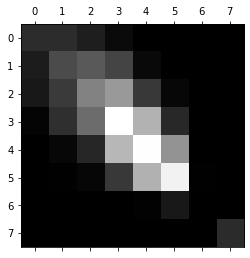

In [232]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

From our best model, we can see that our accuracy is only about 40%. We still have a lot of room for improvement. In the graph, we can see that the lighter colors are the best we are predicting the different labels. We are doing a good job predicting class 3 , 4, 5, but at the same time we are not doing a good job predicting class 6, or class 0 and 7.

# Evaluate on the Test Set

In [236]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('LeagueIndex', axis=1)
y_test = strat_test_set['LeagueIndex'].copy()

X_test_prepared = pipeline.transform(X_test)

In [238]:
final_predictions = final_model.predict(X_test_prepared)
accuracy_score(y_test, final_predictions)

0.4108983799705449

Our final model gave us a testing accuracy of 41%, it is very similar to what we obtained in train/val accuracy. The model that we are using have a lot of room for improvement. Because our train and test scores are low, we can try to collect more data to the dataset. There could be other useful features that we are not using and also more observations might be needed. Also, we could try using more complex models. Trying Neural Networks in this dataset would be an interesting idea for trying to improve the accuracy on ranking prediction.